In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

%matplotlib inline

In [2]:
weather = pd.read_csv('weather_cleaned_final.csv')

In [3]:
weather.drop(columns='Unnamed: 0', inplace=True)

In [4]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rain
0,1,2007-05-01,83,50,66.5,51,56,0.0,29.10,29.82,1.7,27,9.2,0
1,2,2007-05-01,84,52,68.0,51,57,0.0,29.18,29.82,2.7,25,9.6,0
2,1,2007-05-02,59,42,50.5,42,47,0.0,29.38,30.09,13.0,4,13.4,0
3,2,2007-05-02,60,43,51.5,42,47,0.0,29.44,30.08,13.3,2,13.4,0
4,1,2007-05-03,66,46,56.0,40,48,0.0,29.39,30.12,11.7,7,11.9,0


In [5]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [6]:
weather = weather.set_index('Date')

In [7]:
weather.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb          int64
PrecipTotal    float64
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
Rain             int64
dtype: object

In [8]:
train = pd.read_csv('train_cleaned.csv')

In [9]:
train.drop(columns='Unnamed: 0', inplace=True)

In [10]:
test = pd.read_csv('test_cleaned.csv')

In [11]:
test.drop(columns='Unnamed: 0', inplace=True)

In [12]:
def closest_point(point):
    station1, station2 = [41.995, -87.933], [41.786, -87.752]  # Fixed coordinates for two stations
    points = [station1, station2] 
    if cdist([point], points).argmin() == 0: return 1 # return index of closest point
    return 2

In [13]:
# Assign Station to train data based on station coordinates
train['Station'] = [closest_point(x) for x in train[['Latitude','Longitude']].values]
test['Station'] = [closest_point(x) for x in test[['Latitude','Longitude']].values]

In [14]:
# Convert test and train data to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [15]:
train = train.merge(weather, on=['Date','Station'])

In [16]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rain
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,2,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,74.0,58,65,0.0,29.39,30.11,5.8,18,6.5,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,2,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,74.0,58,65,0.0,29.39,30.11,5.8,18,6.5,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,7,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,74.0,58,65,0.0,29.39,30.11,5.8,18,6.5,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,15,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,74.0,58,65,0.0,29.39,30.11,5.8,18,6.5,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,15,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,74.0,58,65,0.0,29.39,30.11,5.8,18,6.5,0


In [17]:
train.dtypes.keys()

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Year', 'Month', 'Tot_Mos_Species',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Rain'],
      dtype='object')

In [18]:
train_num = train.drop(columns=train.dtypes[train.dtypes == 'object'].keys())

In [19]:
train_num.columns

Index(['Date', 'Block', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Year', 'Month', 'Tot_Mos_Species',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Rain'],
      dtype='object')

In [20]:
train_num = train_num[['Date', 'Block', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'Year', 'Month', 'Tot_Mos_Species',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Rain','WnvPresent']]

In [30]:
# removed categorical data
train_cont = train_num[[
       'NumMosquitos', 'Tot_Mos_Species',
       'Station', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed','WnvPresent']]

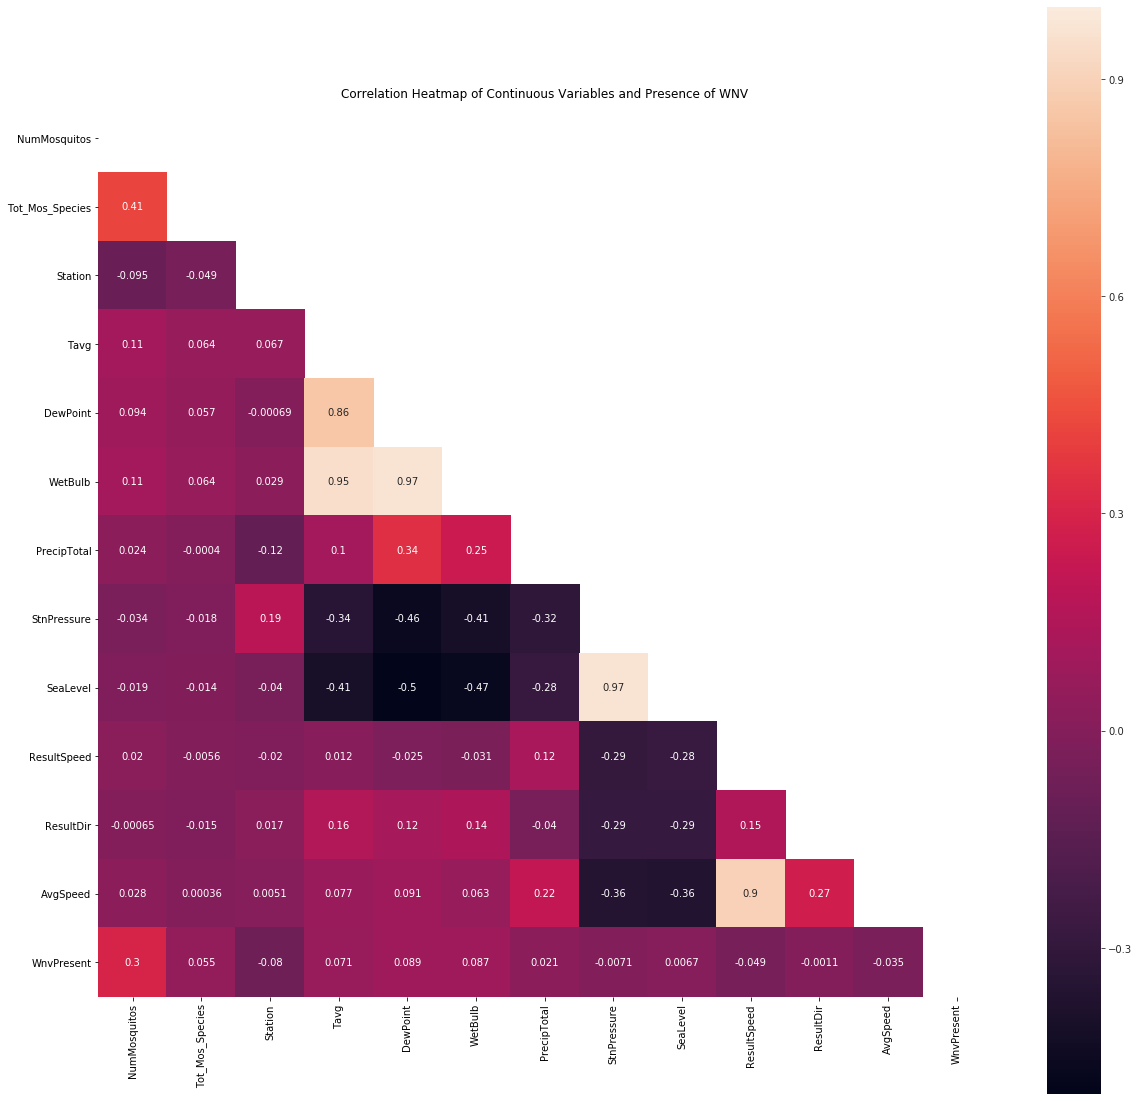

In [31]:
#establish figure size
plt.figure(figsize=(20,20))

#setting title
ax = plt.axes()
ax.set_title('Correlation Heatmap of Continuous Variables and Presence of WNV')

#set up mask to be "True" in the upper triangle
mask = np.zeros_like(train_cont.corr())
mask[np.triu_indices_from(mask)] = True

#plotting heatmap while masking upper triangle with white
with sns.axes_style("white"):
    sns.heatmap(train_cont.corr(), mask=mask, square = True, annot=True)

From the heatmap, we can see that there are a few collinear features:
- AvgSpeed & ResultSpeed
- SeaLevel & StnPressure
- WetBulb & DewPoint
- DewPoint & Tavg
- WetBulb & Tavg

We will then pick the features with higher (absolute) correlation vs presence of WNV to keep from the pairs:
- ResultSpeed (-0.049)
- StnPressure (-0.0071)
- DewPoint (0.087) (highest correlation vs WNV between Tavg, DewPoint, WetBulb)

In [33]:
# further removed collinear features
train_cont = train_num[[
       'NumMosquitos', 'Tot_Mos_Species',
       'Station', 'DewPoint', 'PrecipTotal',
       'StnPressure', 'ResultSpeed', 'ResultDir','WnvPresent']]

In [34]:
train_cont.head()

,NumMosquitos,Tot_Mos_Species,Station,DewPoint,PrecipTotal,StnPressure,ResultSpeed,ResultDir,WnvPresent
0,1,1,1,58,0.0,29.39,5.8,18,0
1,1,1,1,58,0.0,29.39,5.8,18,0
2,1,1,1,58,0.0,29.39,5.8,18,0
3,1,1,1,58,0.0,29.39,5.8,18,0
4,4,4,1,58,0.0,29.39,5.8,18,0


In [35]:
train_cont.to_csv('train_cont.csv')